# My question is what the proportion of TV shows is that have English as their original language.

In [2]:
API_KEY = "f28b066ae0deeff203447587ab05b95d"

In [10]:
# Code preserved for documentation purposes
"""
import requests as rq
import random as rand
import pandas as pd

# Send a GET request with API key as a query parameter
params = {
    "api_key": API_KEY,
    "language": "en-US"
}

all_shows_data = []

shows_found = 0
shows_checked = 0
rate_limit_reached = False

while shows_found < 1000 and not rate_limit_reached:
    show_id = rand.randint(0, 300000)
    url = f"https://api.themoviedb.org/3/tv/{show_id}"
    response = rq.get(url, params=params)
    shows_checked += 1
    # Check if the request was successful
    if response.status_code == 200:
        all_shows_data.append(response.json())
        shows_found += 1
    elif response.status_code == 429:
        rate_limit_reached = True
        print(f"Rate limit reached after {shows_checked} requests")

print(shows_found / shows_checked)

# Create a pandas DataFrame from the collected show data
shows_df = pd.DataFrame(all_shows_data)

# Save the DataFrame to a CSV file in your local working directory
shows_df.to_csv("shows_data.csv", index=False)
"""

0.6523157208088715


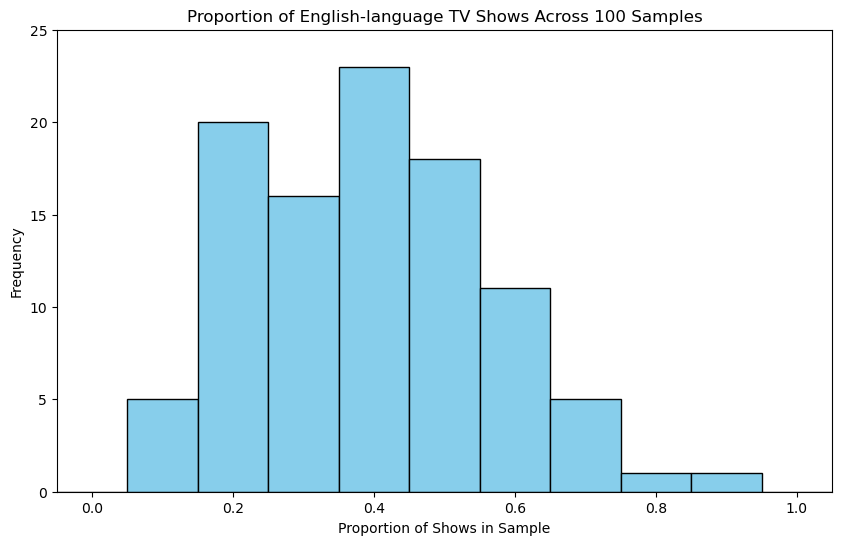

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

shows_df = pd.read_csv("shows_data.csv")

num_samples = 100
sample_size = len(shows_df) // num_samples

proportions = []

for i in range(num_samples):
    start_idx = i * sample_size
    end_idx = start_idx + sample_size
    sample = shows_df.iloc[start_idx:end_idx]
    prop_en = (sample['original_language'] == 'en').mean()
    proportions.append(prop_en)

plt.figure(figsize=(10,6))
plt.hist(proportions, bins=11, range=(-0.05, 1.05), color='skyblue', edgecolor='black')
plt.xlabel("Proportion of Shows in Sample")
plt.ylabel("Frequency")
plt.title("Proportion of English-language TV Shows Across 100 Samples")
plt.xlim(-0.05, 1.05)
plt.ylim(0, 25)
plt.show()